# LnD
---


*Code made by [Diego Oliveira](https://github.com/d116626)

### Import required libraries

In [1]:
# IMPORT CONFIGs
import os
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../scripts')

# DATA ANALYSIS & VIZ TOOLS
from copy import deepcopy

import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.width', 1000)


import numpy as np


import matplotlib.pyplot as plt
# %pylab inlineL
# pylab.rcParams['figure.figsize'] = (12, 12)
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import itertools


from pylab import rcParams
rcParams['figure.figsize'] = 7, 7


import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# from plotly.plotly import iplot
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='d116626', api_key='rCLXowBHHQLJHHzTxSNM')
init_notebook_mode(connected=True)


### Auxiliary functions

In [2]:
def categorical_plot(df,cols,biv=False,target='sent_to_analysis'):
    
    if len(cols)%2 == 0:
        rows = len(cols)/2
    else:
        rows = (len(cols)+1)/2
        
    if biv == False:
        fig = plt.figure(figsize=(20,6*rows))
        i=1

        for col in cols:
            fig.add_subplot(rows,2,i, title = col)
            df[col].value_counts(normalize=True, dropna=False).plot.bar(title=col)        
            i+=1
    else:
        fig = plt.figure(figsize=(20,9*rows))
        i=1
        
        for col in cols:
            
            cross=pd.crosstab(df[col],df[target])
            ax = plt.subplot(rows,2,i, title = col)
            cross.div(cross.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, ax=ax)
            i+=1
    plt.tight_layout()
    return(plt.show())


def numerical_plot(df,cols):
    
    rows = len(cols)
    
    fig = plt.figure(figsize=(20,6*rows))
    i=1
    
    for col in cols:
        
        #distplot    
        try:
            fig.add_subplot(rows,2,i, title = col)
            sns.distplot(list(df[col]),color='steelblue',rug=True)        
        
        except:
            #nan exception
            fig.add_subplot(rows,2,i ,title = col)
            mask = df[col].notnull()
            sns.distplot(list(df[mask][col]),color='steelblue', rug=True)
        
        
        #boxplot
        fig.add_subplot(rows,2,i+1, title = col)
        df[col].plot.box()
        
        i+=2
    plt.tight_layout()
    return(plt.show())



In [3]:
def get_vol(df):
    first_name = list(df.columns)
    last_name  = list(df.loc[0])

    name = ['{}_volume'.format(first).replace('#','') for first in first_name[3:] ]

    final_name = last_name[:3]+name
    final_name = [name.lower() for name in final_name]

    df = df.drop(labels=[0], axis=0)
    df.columns = final_name
    
    cols = ['subject','idade','sexo','etiv_volume']
    
    df['sexo'] = np.where(df['sexo']=='M',1,0)
    
    df[cols[1:]] = df[cols[1:]].astype(float)
    
    return(df[cols])

def get_XH(df):
    first_name = list(df.columns)
    last_name  = list(df.loc[0])

    name = ['{}__thick_avg'.format(first).replace('#','') for first in first_name[3:] ]

    final_name = last_name[:3]+name
    final_name = [name.lower() for name in final_name]

    df = df.drop(labels=[0], axis=0)
    df.columns = final_name
    
    df['sexo'] = np.where(df['sexo']=='M',1,0)
    
    df[final_name[1:]] = df[final_name[1:]].astype(float)
    
    
    return(df)

### Import data

### Sheets
  * Volume
  * Gyri+Sulci LH
  * Gyri+Sulci RH

In [4]:
df_vol = pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Volume')
df_LH = pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Gyri+Sulci LH')
df_RH= pd.read_excel("espessura_fabiana_573.xlsx",sheet_name='Gyri+Sulci RH')


In sex:
   * Male   = 1
   * Female = 0

In [5]:
df_etiv = get_vol(df_vol)
df_lh = get_XH(df_LH)
df_rh = get_XH(df_RH)

df_lh = pd.merge(df_etiv,df_lh, how='inner', on=['subject','idade','sexo'])
df_rh = pd.merge(df_etiv,df_rh, how='inner', on=['subject','idade','sexo'])

### Get familiar with data

In [6]:
df_pre = df_lh.copy()

In [7]:
#column type numbers
df_pre.dtypes.sort_values().to_frame('feature_type').groupby(by = 'feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,float64,77
1,object,1


In [8]:
df_pre.describe().T

,count,mean,std,min,25%,50%,75%,max
idade,573.0,3.693892e+01,13.796654,10.000000,2.600000e+01,3.300000e+01,4.800000e+01,7.000000e+01
sexo,573.0,3.979058e-01,0.489893,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
etiv_volume,573.0,1.362087e+06,223836.702494,764370.869366,1.199564e+06,1.355007e+06,1.533341e+06,2.007531e+06
g&s_cingul-ant__thick_avg,573.0,2.717644e+00,0.182992,2.148000,2.596000e+00,2.717000e+00,2.834000e+00,3.666000e+00
g&s_cingul-mid-ant__thick_avg,573.0,2.594578e+00,0.173948,1.897000,2.480000e+00,2.600000e+00,2.712000e+00,3.027000e+00
g&s_cingul-mid-post__thick_avg,573.0,2.572798e+00,0.145565,2.055000,2.473000e+00,2.578000e+00,2.661000e+00,3.272000e+00
g&s_frontomargin__thick_avg,573.0,2.300429e+00,0.182768,1.725000,2.163000e+00,2.291000e+00,2.414000e+00,2.911000e+00
g&s_occipital_inf__thick_avg,573.0,2.332991e+00,0.172927,1.831000,2.210000e+00,2.323000e+00,2.450000e+00,2.918000e+00
g&s_paracentral__thick_avg,573.0,2.302251e+00,0.167502,1.810000,2.198000e+00,2.296000e+00,2.407000e+00,2.851000e+00
g&s_subcentral__thick_avg,573.0,2.621818e+00,0.172905,2.178000,2.499000e+00,2.611000e+00,2.739000e+00,3.200000e+00


In [9]:
def stack_bar(x_m,y_m,x_h,y_h,name):
    trace1 = go.Bar(
        x=x_m,
        y=y_m,
        name='F',
        text=y_m,
        textposition = 'auto'
    )
    trace2 = go.Bar(
        x=x_h,
        y=y_h,
        name='M',
        text=y_h,
        textposition = 'auto'
    )

    data = [trace1, trace2]
    layout = go.Layout(title=name,
        barmode='stack',
        width=400*3.18, 
        height=1.3*660,  #960
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename='stacked-bar')
#     plotly.offline.plot(fig)
    plotly.offline.plot(fig, filename = '%s.html'%name, auto_open=True)

In [10]:
bins = [0,20,30,40,50,60,70,80,90]
labels=['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90']
df_pre['bins'] = pd.cut(df_pre['idade'], bins=bins, labels=labels, include_lowest=True)
df_pre = df_pre.sort_values(by='bins', ascending=True)


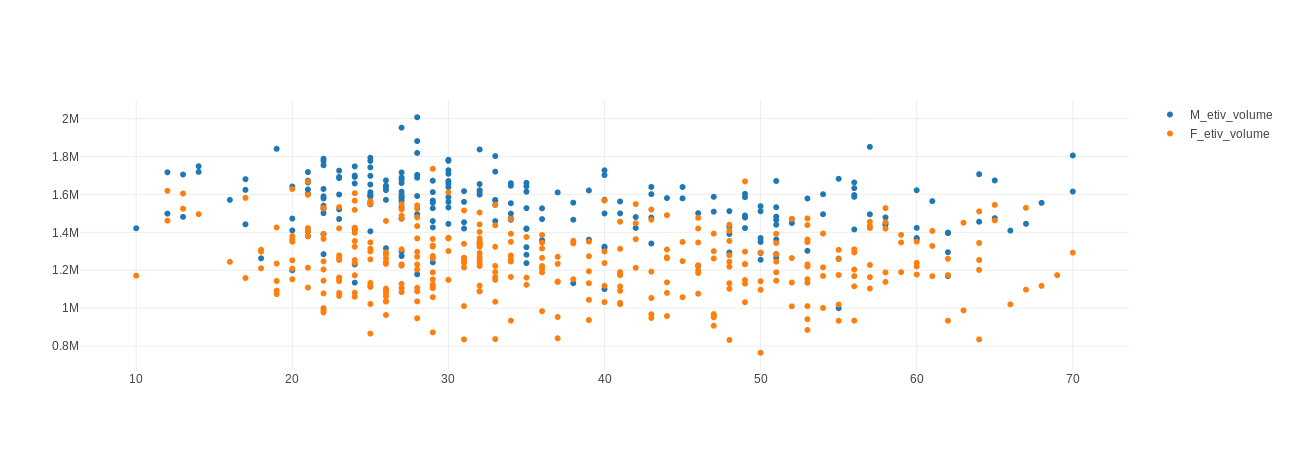

In [12]:
cols_ff = cols_f[:1]
cols_ff = ['etiv_volume']
data=[]
for col in cols_ff:
    trace1 = go.Scatter(
        x = df_m['idade'],
        y = df_m[col],
        mode = 'markers',
        name = 'M_{}'.format(col)
    )
    trace2 = go.Scatter(
        x = df_f['idade'],
        y = df_f[col],
        mode = 'markers',
        name = 'F_{}'.format(col)
    )

    data.append(trace1)
    data.append(trace2)

iplot(data, filename='scatter-mode')

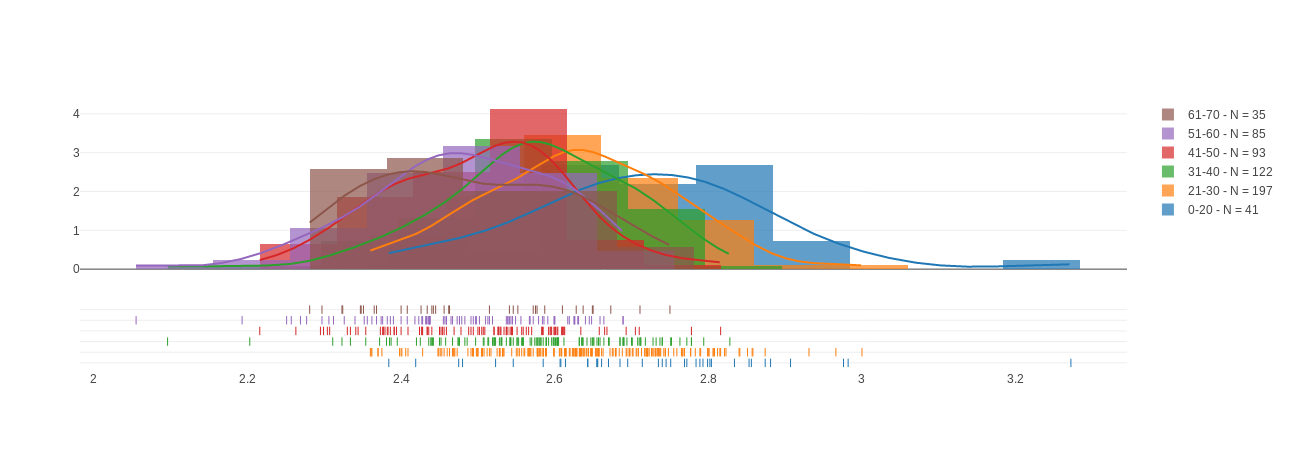

In [17]:
import plotly.figure_factory as ff

f_et = list(df_pre['bins'].unique())
faixa_etaria = f_et[:]

n=3

group_labels=[]
hist_data   =[]

for f in faixa_etaria:
    mask = df_pre['bins']==f
    df_faixaEtaria = df_pre[mask]
    
    x = list(df_faixaEtaria[cols_f[n]])
    g = '{} - N = {}'.format(f,len(df_faixaEtaria))
    
    
    q75, q25,q50 = np.percentile(x, [75 ,25,50])
    iqr = q75 - q25

    # print ( q25, q50, q75,iqr)
    bin_w = (2 *iqr )/ (len(x)**(1/3))



    # Group data together
    hist_data.append(x)

    group_labels.append(g)

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.1)

# Plot!
iplot(fig, filename='Distplot with Multiple Datasets')

## 2. Numerical data

20


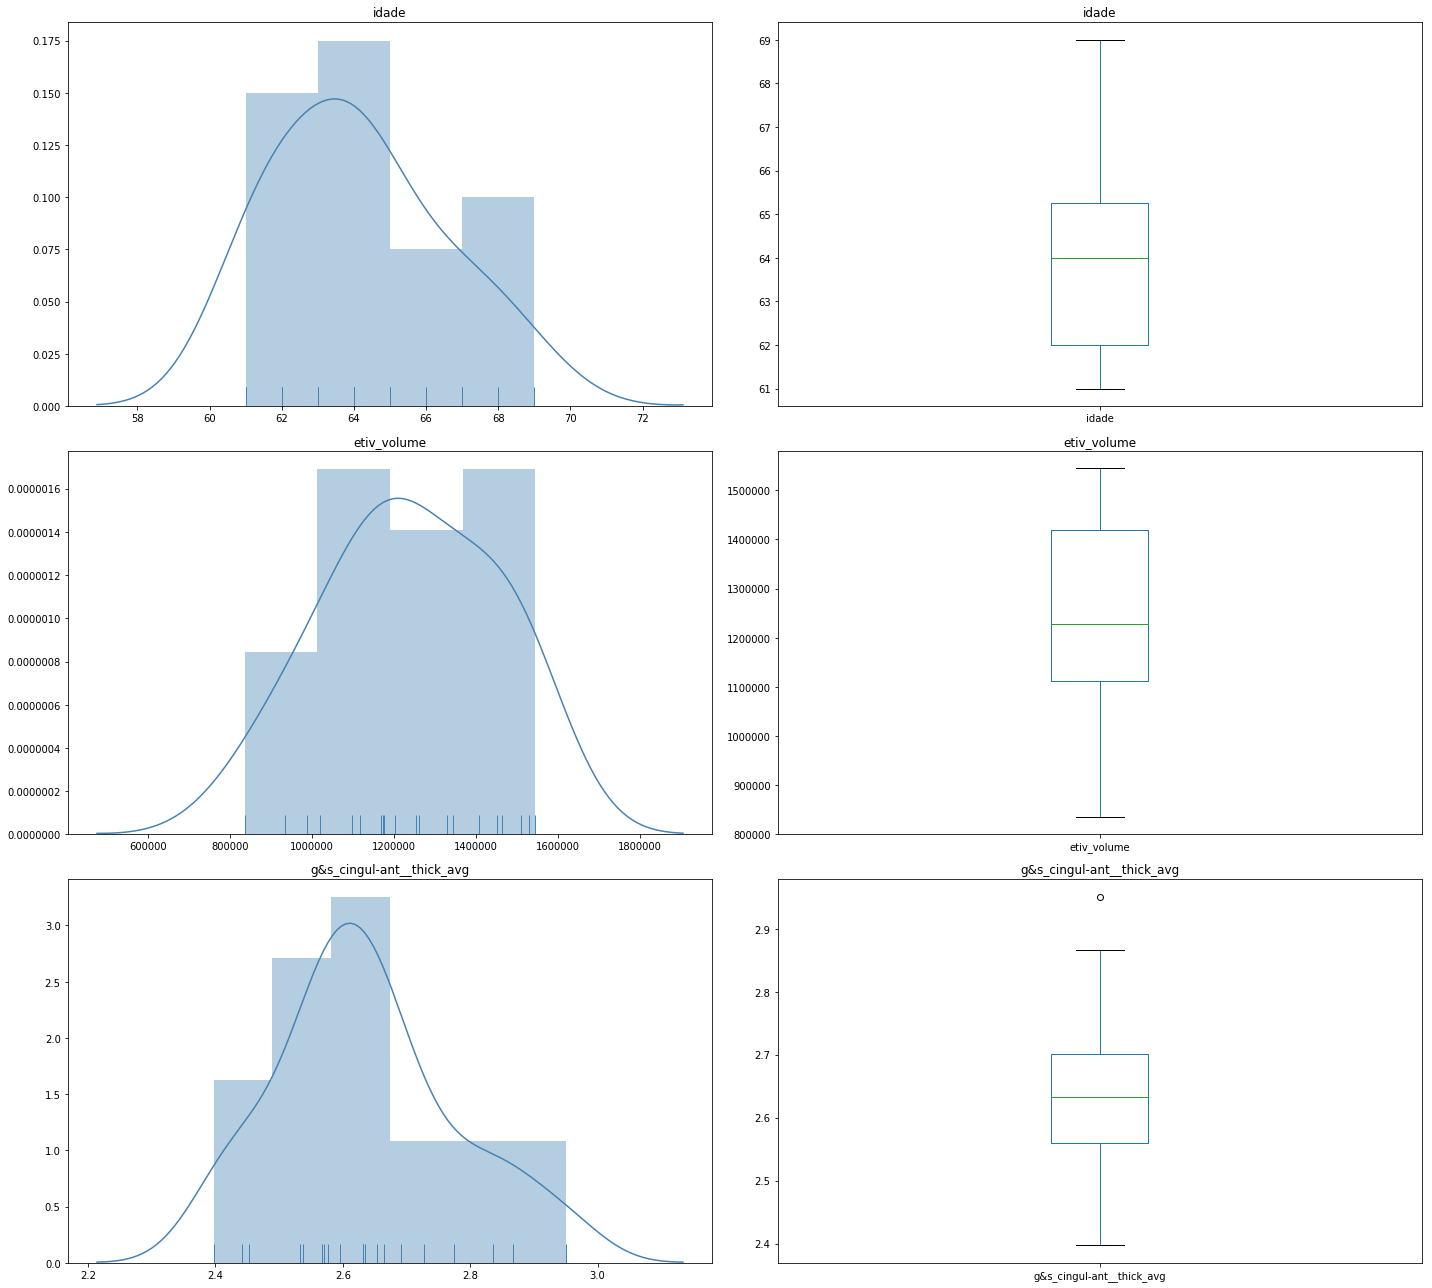

In [173]:
idade_i = 61
idade_f = 70
sex     = 0

mask = (df_pre['idade']>= idade_i) & (df_pre['idade']<idade_f) & (df_pre['sexo']==sex)

cols = ['idade','etiv_volume','g&s_cingul-ant__thick_avg']

print(len(df_pre[mask]))

numerical_plot(df_pre[mask],cols)

### Numerical Variable
Let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

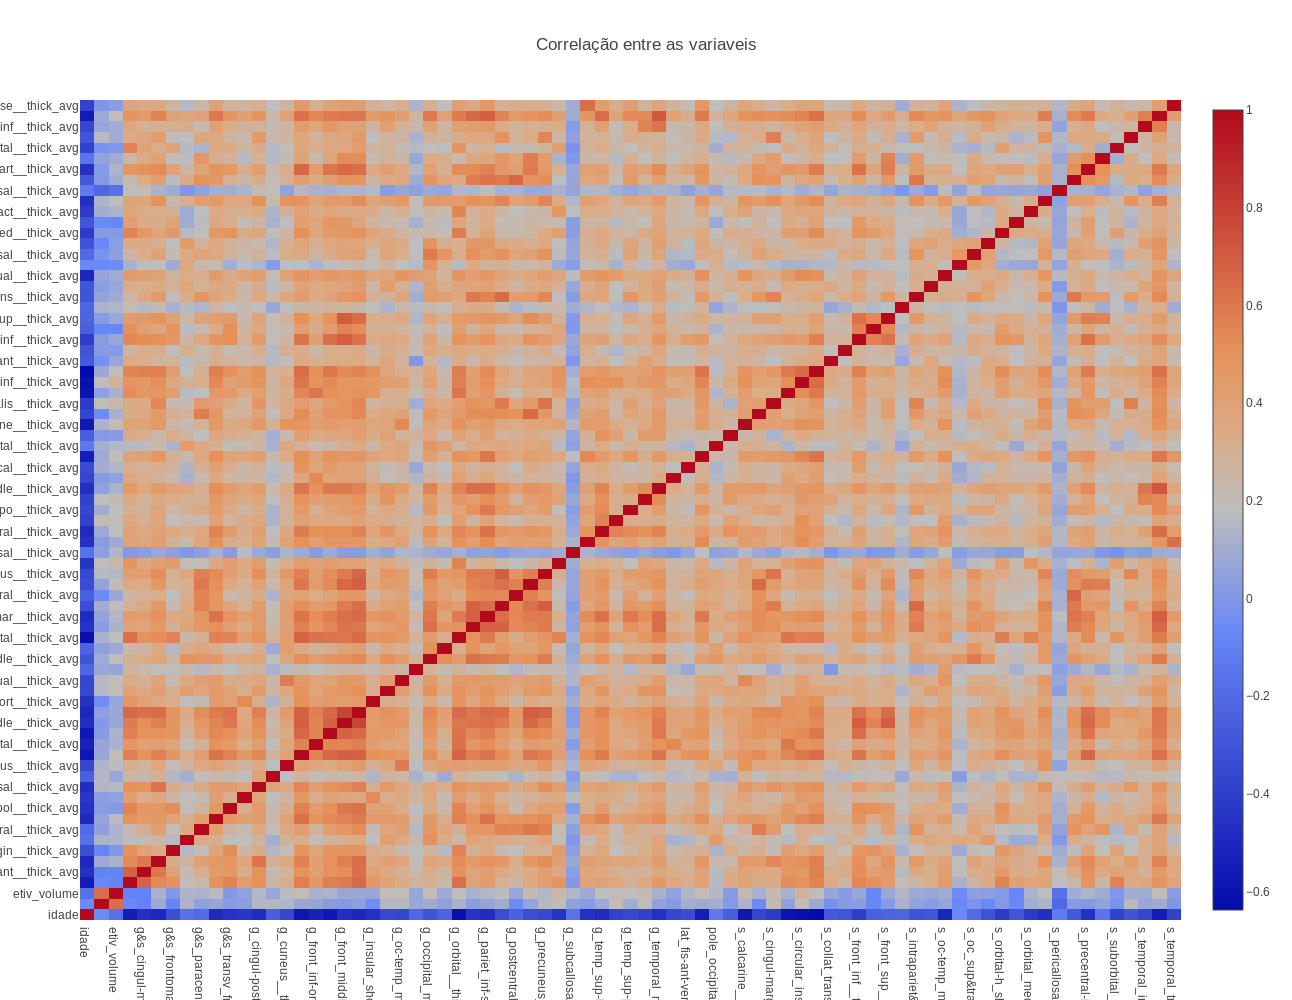

'braskem_corr_categorias.html'

In [24]:
import plotly.plotly as py
import plotly.graph_objs as go

corr_m = df_pre.corr()

colorscales = ['Greys', 'YlGnBu', 'Greens', 'YlOrRd', 'Bluered', 'RdBu',
            'Reds', 'Blues', 'Picnic', 'Rainbow', 'Portland', 'Jet',
            'Hot', 'Blackbody', 'Earth', 'Electric', 'Viridis', 'Cividis']

heatmap = go.Heatmap(z=corr_m.as_matrix(), x=corr_m.columns, y=corr_m.index,autocolorscale=True)


data=[heatmap]


#     print(df__['{}_0'.format(clas)].sum())
layout = dict(title='Correlação entre as variaveis',
             xaxis=dict(
                            autorange=True,
                            showgrid=True,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                        yaxis=dict(
                            autorange=True,
                            showgrid=False,
                            zeroline=False,
                            showline=False,
                            ticks='',
                            showticklabels=True
                        ),
                  width=1000, 
                  height=1000,  #960
                  margin=go.layout.Margin(
#                                             l=410,
    #                                       r=50,
    #                                       b=100,
    #                                       t=100,
    #                                       pad=4
                                        ),
    #               paper_bgcolor='rgba(1,2,0,0)',
    #               plot_bgcolor='rgba(1,2,0,0)'
             )



fig = go.Figure(data=data, layout=layout)
#     plotly.offline.plot(fig)

iplot(fig, filename='horizontal-bar')
# pio.write_image(fig, 'braskem_corr_categorias.'%(OUTPUT_PATH,targ.lower(),clas))
plotly.offline.plot(fig, filename = 'braskem_corr_categorias.html', auto_open=False)

## Model Building

In [206]:
df_aux = df_pre.copy()

before start the model building we need to separate a sample of original data for test our model

we going to separate 30% for last test

* We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

* Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many inbuilt functions that can be used for modeling in Python.

To learn further about sklearn, refer here: http://scikit-learn.org/stable/tutorial/index.html

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing



from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, cross_validate


In [208]:
df_aux_id = df_aux['subject']
df_aux    = df_aux.drop(columns=['subject'])

In [209]:
main_cols = df_aux.columns[:3]
y_cols    = df_aux.columns[3:]

In [210]:
X = df_aux[main_cols]
y = df_aux[y_cols[0]]
y_cols[0]

'g&s_cingul-ant__thick_avg'

Now we will train the model dataset and make predictions. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part.

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

In [211]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(X, y,random_state = 4,test_size=0.05)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy_score from sklearn and fit the logistic regression model.

# Linear Regression

In [248]:
n_folds = 10

def rmsle_cv(X,y,model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)



def train_test_validation(X_train, y_train,test_x,test_y, model, model_name,param_grid_model,kfold,score_par):

    model = GridSearchCV(estimator=model, param_grid=param_grid_model, scoring=score_par,n_jobs=-1,pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)


    
    ####=========================FIT AND PREDICT===========================####
    model.fit(X_train,y_train)

    print('Best score: ', model.best_score_)
    print('Best parameters set: \n', model.best_params_)
    

    print("MAE:", metrics.mean_absolute_error(list(test_y), model.best_estimator_.predict(test_x)))
    print('MSE:', metrics.mean_squared_error(list(test_y), model.best_estimator_.predict(test_x)))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(list(test_y), model.best_estimator_.predict(test_x))))
    print('R2:',metrics.r2_score(list(test_y), model.best_estimator_.predict(test_x)))

    return(model.best_estimator_)



In [249]:
from sklearn.linear_model import LinearRegression


model      = LinearRegression()
model_name ='Linear Regression'

param_grid_model  = {}

kfold = 10
score_par= 'r2'

lr = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)


score = rmsle_cv( train_x,train_y,lr)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))




predictions_model = pd.DataFrame(list(test_y), columns=['real'])
predictions_model['pred_ln'] = lr.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Best score:  0.31215683424657464
Best parameters set: 
 {}
MAE: 0.1207607929435312
MSE: 0.023534779449885794
RMSE: 0.15341049328480041
R2: 0.24260654718908503
Stacking Averaged models score: 0.1488 (0.0156)


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.5s finished


In [250]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs



,Coefficient
sexo,1.518678e-02
etiv_volume,-1.693284e-07
idade,-7.957373e-03


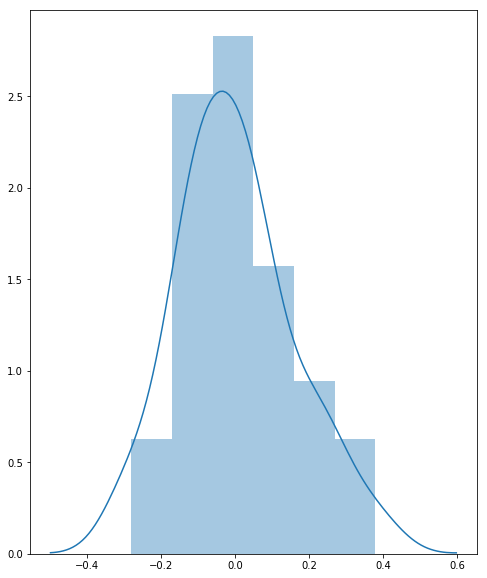

In [251]:
sns.distplot((predictions_model['real']-predictions_model['pred_ln']))

# Lasso Regression

In [264]:
from sklearn.linear_model import LinearRegression


model      = Lasso(random_state=42)
model_name ='Lasso Regression'

param_grid_model  = {'alpha':[0.0005,0.0006,0.06,0.5,0.0001,0.01,1,2,3,4,4.4,4]}

kfold = 10
score_par= 'neg_mean_squared_error'

lss = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

score = rmsle_cv( train_x,train_y,lss)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


predictions_model['pred_lss'] = lss.predict(test_x)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best score:  -0.022315393280752913
Best parameters set: 
 {'alpha': 0.01}
MAE: 0.1198428208855544
MSE: 0.023218326400348297
RMSE: 0.15237560959795468
R2: 0.2527906013185114
Stacking Averaged models score: 0.1485 (0.0157)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    0.1s finished


# XGBoost

In [253]:
import xgboost as xgb

model      = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_name ='XGB Regression'

param_grid_model  = {
    }

kfold = 10
score_par= 'neg_mean_squared_error'

xgb = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

score = rmsle_cv( train_x,train_y,xgb)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

predictions_model['pred_xgb'] = xgb.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.3s finished


Best score:  -0.023514742216556035
Best parameters set: 
 {}
MAE: 0.13099592254901757
MSE: 0.025342228986359357
RMSE: 0.15919242754088322
R2: 0.184439422737114
Stacking Averaged models score: 0.1524 (0.0164)


# Gradient Boosting Regressor

In [254]:
from sklearn.ensemble import GradientBoostingRegressor

model= GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


model_name ='GBRegression'

param_grid_model  = {
    }

kfold = 10
score_par= 'neg_mean_squared_error'

rgb = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

score = rmsle_cv( train_x,train_y,rgb)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))



predictions_model['pred_rgb'] = xgb.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished


Best score:  -0.0302678978469103
Best parameters set: 
 {}
MAE: 0.16263573426884806
MSE: 0.03880453832373296
RMSE: 0.19698867562307473
R2: -0.24880300358575047
Stacking Averaged models score: 0.1733 (0.0147)


# LightGBM

In [255]:
from sklearn.ensemble import GradientBoostingRegressor

model= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)


model_name ='LightGBM'

param_grid_model  = {
    }

kfold = 10
score_par= 'neg_mean_squared_error'

lgbm = train_test_validation(train_x, train_y,test_x,test_y, model,model_name,param_grid_model,kfold,score_par)

score = rmsle_cv( train_x,train_y,lgbm)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


predictions_model['pred_lgbm'] = lgbm.predict(test_x)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.6s finished


Best score:  -0.02504574369234474
Best parameters set: 
 {}
MAE: 0.13894998096229177
MSE: 0.028367595388351787
RMSE: 0.1684268250260385
R2: 0.08707744362435443
Stacking Averaged models score: 0.1572 (0.0172)


In [256]:
f_model      = Lasso(alpha =0.0001, random_state=42)
f_model.fit(train_x,train_y)
coefficients = pd.Series(f_model.coef_, index = train_x.columns)

In [257]:
print("Lasso picked " + str(sum(coefficients != 0)) + " variables and eliminated the other " +  str(sum(coefficients == 0)) + " variables")

Lasso picked 3 variables and eliminated the other 0 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

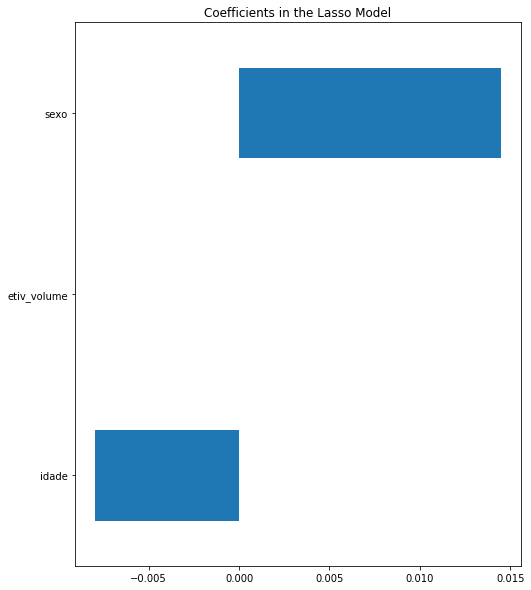

In [258]:
imp_coef = pd.concat([coefficients.sort_values()])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

In [259]:
X=train_x
y=train_y

In [260]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [261]:
averaged_models = AveragingModels(models = (lss, lr, lgbm, rgb))

score = rmsle_cv( X,y,averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1506 (0.0156)



In [262]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [263]:
stacked_averaged_models = StackingAveragedModels(base_models = (lss, lgbm, rgb),
                                                 meta_model = lr)

score = rmsle_cv( X,y,averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))


Stacking Averaged models score: 0.1506 (0.0156)


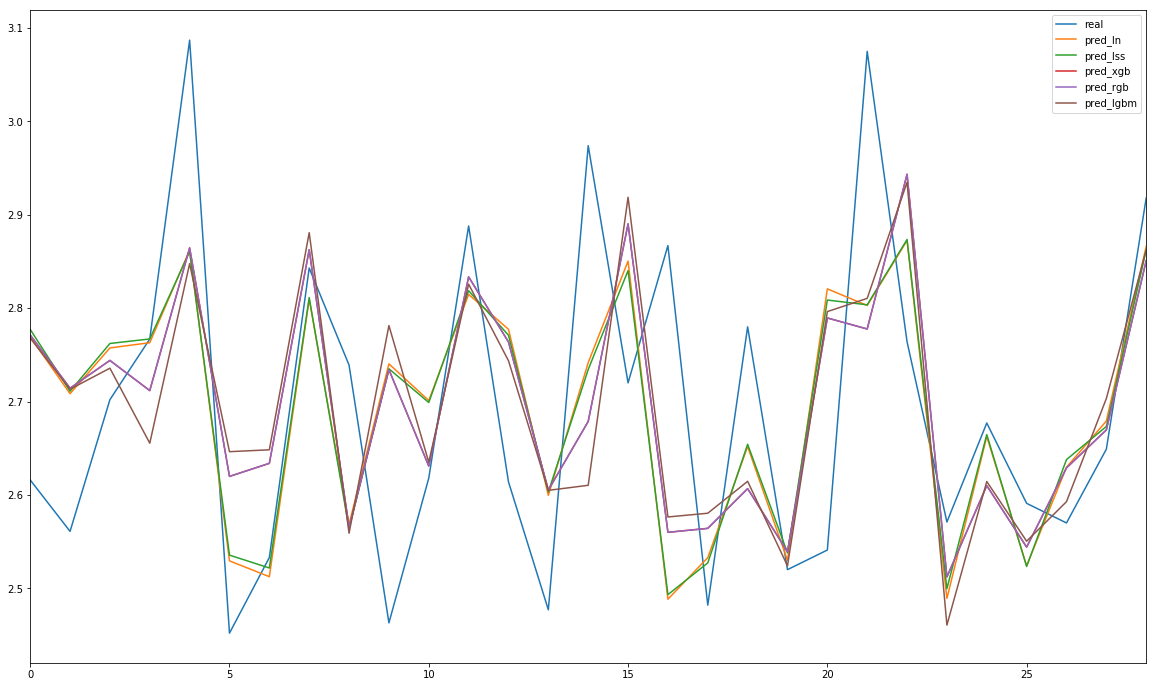

In [265]:
predictions_model.plot(figsize=(20,12))